In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedShuffleSplit, GridSearchCV, validation_curve
from sklearn.metrics import roc_auc_score, f1_score, ConfusionMatrixDisplay, \
    RocCurveDisplay, classification_report, precision_score, recall_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
data = pd.read_csv('winequality-white.csv', sep=';')

**Features**

*   1 - fixed acidity
*   2 - volatile acidity
*   3 - citric acid
*   4 - residual sugar
*   5 - chlorides
*   6 - free sulfur dioxide
*   7 - total sulfur dioxide
*   8 - density
*   9 - pH
*   10 - sulphates
*   11 - alcohol
*   Output variable (based on sensory data): 
    12 - quality (score between 0 and 10)

---






:

In [ ]:
data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


# 1.Exploratory data analysis

In [ ]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [ ]:
data.shape

(4898, 12)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [ ]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

В данных нет пропусков. Все типы данных являются числовыми и корректы.

<Axes: xlabel='quality', ylabel='count'>

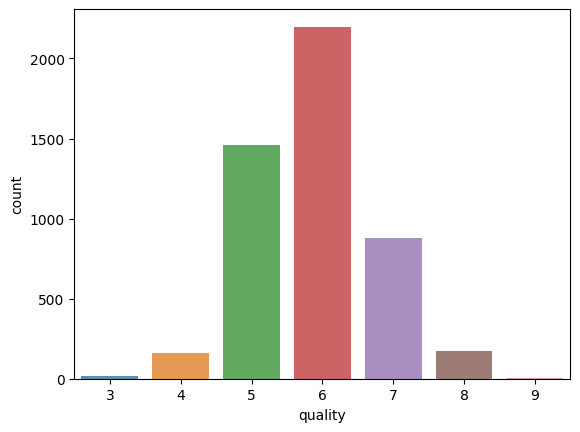

In [ ]:
sns.countplot(x="quality", data=data, alpha=0.8)

In [ ]:
data.quality.value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

In [ ]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [ ]:
cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', \
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', \
       'pH', 'sulphates', 'alcohol', 'quality']


Визуализируем распределения каждой переменной

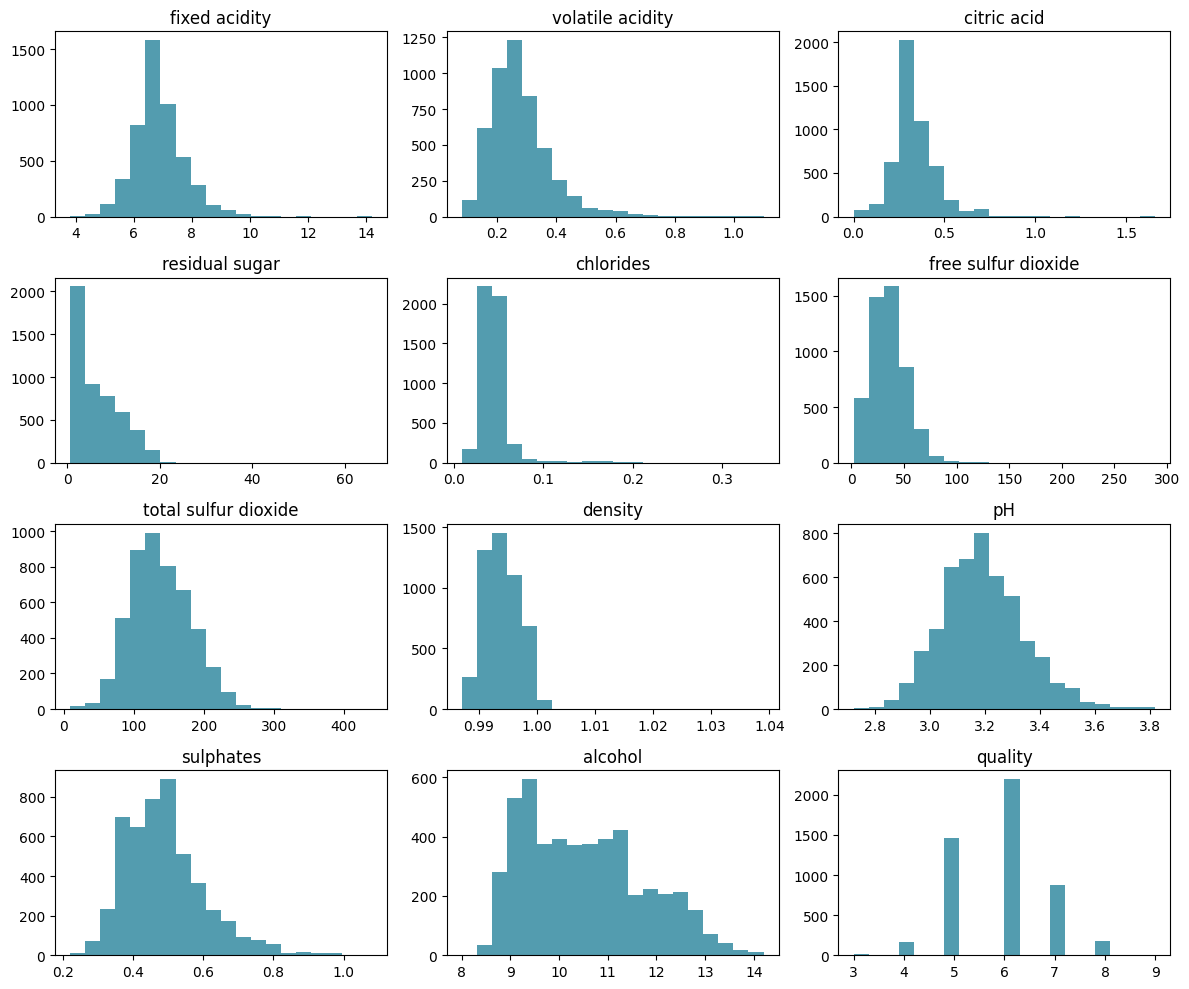

In [ ]:
def hist_print(data, cols):
  plt.figure(figsize=(12, 10))
  
  index = 1
  for i in cols:
    plt.subplot(4, 3, index)
    plt.hist(data[i], bins = 20, color = '#539caf')
    plt.title(i)
    plt.tight_layout()
    index += 1

hist_print(data, cols)

Следующий график показывает, что практически все переменные содержат выбросы. Удаление выбросов приведет к полному удалению классов 3 и 9 целевой переменной, поэтому пока не будем это делать.


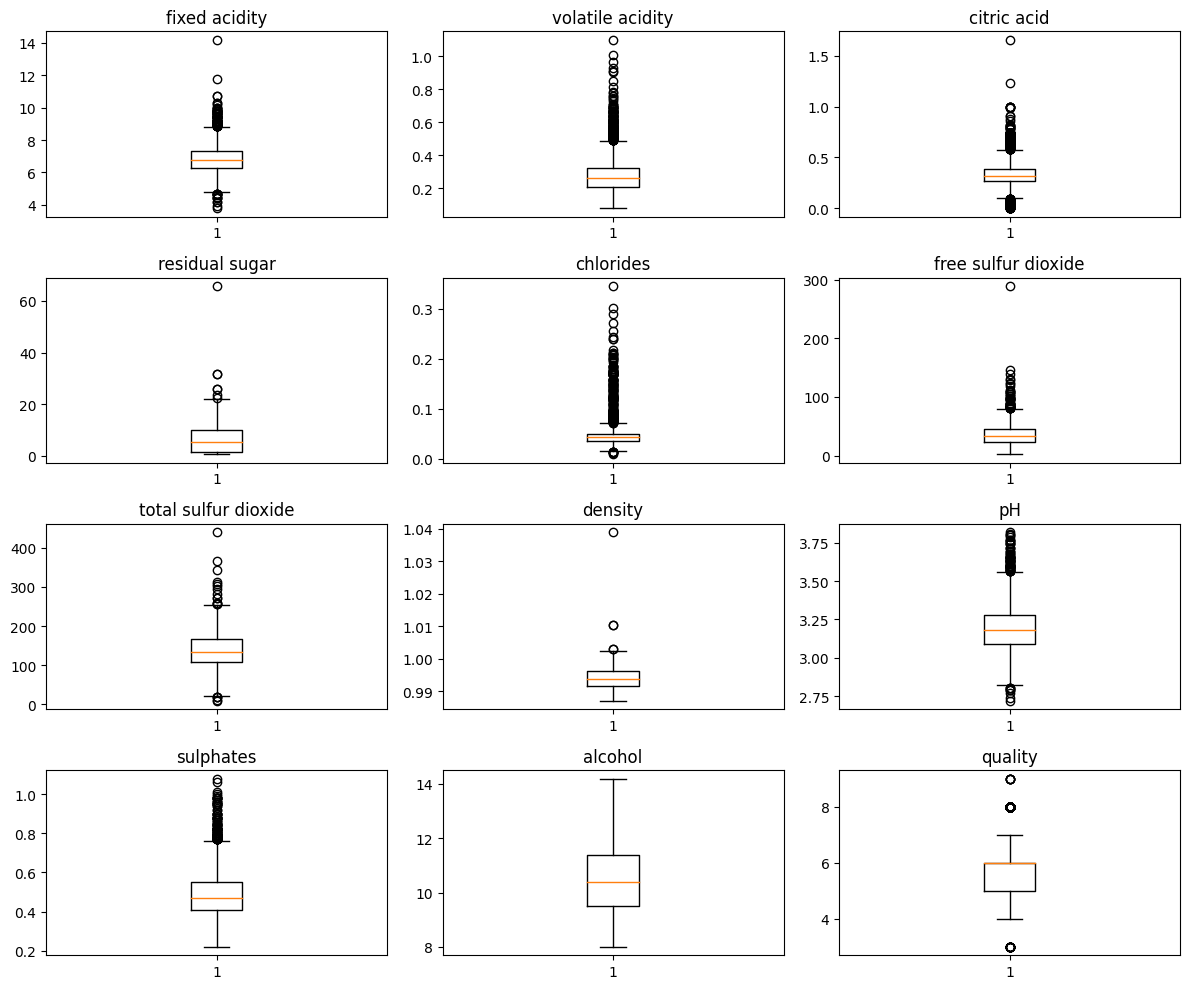

In [ ]:
def boxplot_print(data, cols):
  plt.figure(figsize=(12, 10))
  
  index = 1
  for i in cols:
    plt.subplot(4, 3, index)
    plt.boxplot(data[i])
    plt.title(i)
    plt.tight_layout()
    index += 1

boxplot_print(data, cols)

Сгруппируем все признаки по столбцу quality и вычислим среднее, применив агрегирующую функцию

In [ ]:
 mean_quality = data.groupby('quality').mean()

In [ ]:
mean_quality

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,7.600000,0.333250,0.336000,6.392500,0.054300,53.325000,170.600000,0.994884,3.187500,0.474500,10.345000
4,7.129448,0.381227,0.304233,4.628221,0.050098,23.358896,125.279141,0.994277,3.182883,0.476135,10.152454
5,6.933974,0.302011,0.337653,7.334969,0.051546,36.432052,150.904598,0.995263,3.168833,0.482203,9.808840
6,6.837671,0.260564,0.338025,6.441606,0.045217,35.650591,137.047316,0.993961,3.188599,0.491106,10.575372
7,6.734716,0.262767,0.325625,5.186477,0.038191,34.125568,125.114773,0.992452,3.213898,0.503102,11.367936
8,6.657143,0.277400,0.326514,5.671429,0.038314,36.720000,126.165714,0.992236,3.218686,0.486229,11.636000
9,7.420000,0.298000,0.386000,4.120000,0.027400,33.400000,116.000000,0.991460,3.308000,0.466000,12.180000


Визуализируем средние значения признаков, сгруппированные по целевой переменной. 

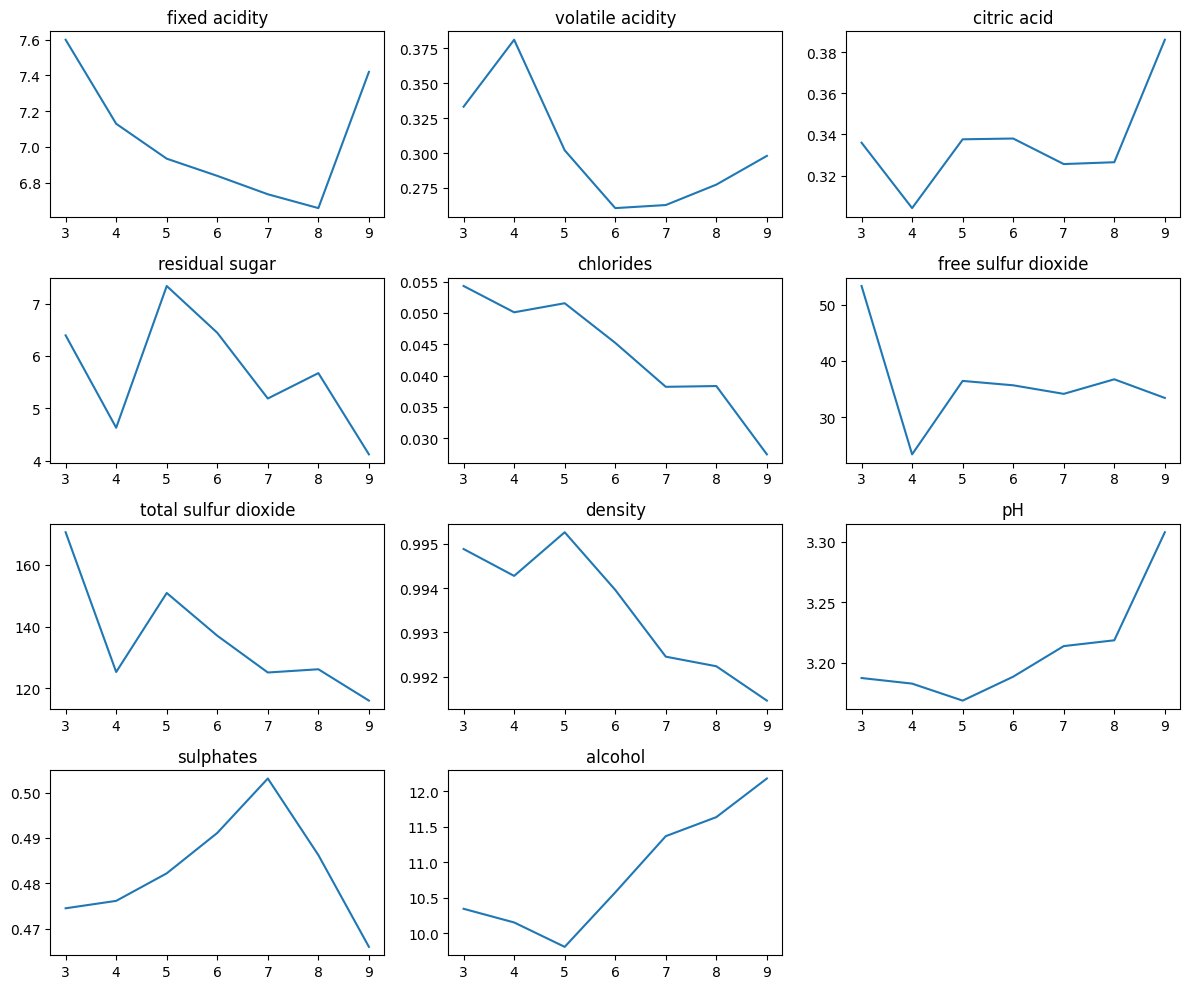

In [ ]:
columns = cols[:-1]
def mean_quality_print(data, columns):
  plt.figure(figsize=(12, 10))
  
  index = 1
  for i in columns:
    plt.subplot(4, 3, index)
    plt.plot(mean_quality[i])
    
    plt.title(i)
    plt.tight_layout()
    index += 1
mean_quality_print(mean_quality, columns)

Из графиков видно, что вина, содержащие большее количество спирта имеют более высокую оценку. С увеличением среднего значения pH, оценка также увеличивается. Уменьшение среднего значения хлоридов, плотности приводит к увеличению оценки


<Axes: >

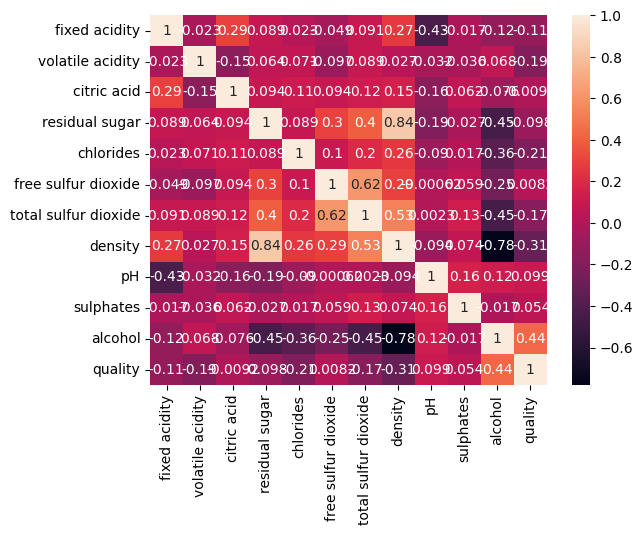

In [ ]:
sns.heatmap(data.corr(),annot=True)

Сильно коррелируют между собой остаточный сахар и плотность, свободный диоксид серы и суммарный диоксид серы, содержание спирта и качество вина, что, в целом, логично. Обратную корреляцию имеют плотность и содержание спирта.

# 2. Modeling

# Random Forest Classifier

In [ ]:
X = data.drop('quality',axis=1)
y = data['quality']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 47, test_size = 0.25)

In [ ]:
clf = RandomForestClassifier(max_depth = 2, random_state = 0)
clf.fit(X, y)

RandomForestClassifier(max_depth=2, random_state=0)

In [ ]:
y_pred =  clf.predict(X_test)

print('Точность измерений (тренировочные данные): ', accuracy_score(y_true = y_train, y_pred = clf.predict(X_train)))
print('Точность измерений (тестовые данные): ', accuracy_score(y_true = y_test, y_pred = y_pred))

Точность измерений (тренировочные данные):  0.523550231418459
Точность измерений (тестовые данные):  0.52


In [ ]:
param_grid = { 
    'n_estimators': [200, 700],
    'max_features': ['auto', 'sqrt', 'log2'],
    
}

In [ ]:
CV_clf = GridSearchCV(estimator=clf, param_grid=param_grid, cv= 5)
CV_clf.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForest

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=2, random_state=0),
             param_grid={'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 700]})

In [ ]:
y_pred =  CV_clf.predict(X_test)

print('Точность измерений (тренировочные данные): ', accuracy_score(y_true = y_train, y_pred = CV_clf.predict(X_train)))
print('Точность измерений (тестовые данные): ', accuracy_score(y_true = y_test, y_pred = y_pred))

Точность измерений (тренировочные данные):  0.523550231418459
Точность измерений (тестовые данные):  0.5085714285714286


# KNN

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.25, random_state = 0)

In [ ]:
model_knn = KNeighborsClassifier(15, weights = 'uniform')
model_knn.fit(X, y)

KNeighborsClassifier(n_neighbors=15)

In [ ]:
y_pred =  model_knn.predict(X_test)

print('Точность измерений (тренировочные данные): ', accuracy_score(y_true = y_train, y_pred = model_knn.predict(X_train)))
print('Точность измерений (тестовые данные): ', accuracy_score(y_true = y_test, y_pred = y_pred))

Точность измерений (тренировочные данные):  0.5619384699156004
Точность измерений (тестовые данные):  0.5314285714285715


In [ ]:
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
  

grid = GridSearchCV(model_knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
  

grid_search=grid.fit(X_train, y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(


In [ ]:
y_pred =  grid_search.predict(X_test)

print('Точность измерений (тренировочные данные): ', accuracy_score(y_true = y_train, y_pred = grid_search.predict(X_train)))
print('Точность измерений (тестовые данные): ', accuracy_score(y_true = y_test, y_pred = y_pred))

Точность измерений (тренировочные данные):  1.0
Точность измерений (тестовые данные):  0.5444897959183673


Метод K-ближайших соседей справился немного лучше, чем случайный лес. Тюнинг модели несильно ее улучшил, применени SMOTE для устранения дисбаланса классов сильно ухудшило модели. Подбор оптимальных параметров с помощью GridSearchCV для KNN cильно переобучил модель. 